In [78]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import Piecewise
from nengo.processes import WhiteSignal
from nengo.solvers import LstsqL2

In [79]:
Morse = {
    # codes from https://www.itu.int/rec/R-REC-M.1677-1-200910-I/en
    "A": "10111",
    "B": "111010101",
    "C": "11101011101",
    "D": "1110101",
    "E": "1",
    "F": "101011101",
    "G": "111011101",
    "H": "1010101",
    "I": "101",
    "J": "1011101110111",
    "K": "111010111",
    "L": "101110101",
    "M": "1110111",
    "N": "11101",
    "O": "11101110111",
    "P": "10111011101",
    "Q": "1110111010111",
    "R": "1011101",
    "S": "10101",
    "T": "111",
    "U": "1010111",
    "V": "101010111",
    "W": "101110111",
    "X": "11101010111",
    "Y": "1110101110111",
    "Z": "11101110101",
    " ": "0",  # space
    "1": "10111011101110111",
    "2": "101011101110111",
    "3": "1010101110111",
    "4": "10101010111",
    "5": "101010101",
    "6": "11101010101",
    "7": "1110111010101",
    "8": "111011101110101",
    "9": "11101110111011101",
    "0": "1110111011101110111",
    ".": "10111010111010111",  # period
    ",": "1110111010101110111",  # comma
    ":": "11101110111010101",  # colon
    "?": "101011101110101",  # question
    "'": "1011101110111011101",  # apostrophe
    "-": "111010101010111",  # dash or minus
    "/": "1110101011101",  # slash
    "(": "111010111011101",  # left parenthesis
    ")": "1110101110111010111",  # right parenthesis
    "\"": "101110101011101",  # quote
    "=": "1110101010111",  # equals
    "+": "1011101011101",  # plus
    "@": "10111011101011101",  # at sign (@)
    # these punctuation marks are not included in the ITU recommendation,
    # but are found in https://en.wikipedia.org/wiki/Morse_code
    "!": "1110101110101110111",  # exclamation point
    "&": "10111010101",  # ampersand (also prosign for 'WAIT')
    ";": "11101011101011101",  # semicolon
    "_": "10101110111010111",  # underscore
    "$": "10101011101010111"  # dollar sign
}


In [80]:
#take user input
msg = input("Type phrase to translate here: ")
print('\n', msg)
#convert to all uppercase
msg = msg.upper()
#transform from string to an array with each character a separate element
msg = list(msg)
print('\n', msg)
my_morse = []
#evaluate each character in the list and convert to morse
for i in msg:
    my_morse.append(Morse.get(i))

print('\n', my_morse, '\n')
print(len(my_morse))


 A

 ['A']

 ['10111'] 

1


In [81]:
temp_inputs = [int for string in my_morse for int in string] #got this line from Chat GPT
for i in range(0,4):
    temp_inputs.append('0')
print(temp_inputs)

['1', '0', '1', '1', '1', '0', '0', '0', '0']


In [82]:
model = nengo.Network(label="Mercier Final Project")

send_inp = [] #1 for dot; 2 for dash
count = 0
for i in range(len(temp_inputs)):
    if temp_inputs[i] == '1':
        count += 1
        if count == 3:
            send_inp.append(2)
            count = 0
    if temp_inputs[i] == '0' and count == 1:
        send_inp.append(1)
        count = 0
print(send_inp)

with model:
    def input_func(array_in):
        t = [0]
        x = [0]
        for i in array_in:
            if i == 1:
                x.append(.5)
                x.append(0)
                t.append(t[-1]+.33)
                t.append(t[-1]+.33)
            elif i ==2: 
                x.append(1)
                x.append(0)
                t.append(t[-1]+.66)
                t.append(t[-1]+1)
        piecewise = Piecewise({time:value for time, value in zip(t,x)})
        return piecewise
        
    input_node = nengo.Node(input_func(send_inp))

[1, 2]


In [83]:
with model:
    ensembleA = nengo.Ensemble(n_neurons=200, dimensions=1)
    nengo.Connection(input_node, ensembleA)
    
    probe1 = nengo.Probe(input_node)
    probe2 = nengo.Probe(ensembleA, synapse=.01)
    

In [84]:
# model = nengo.Network(label="Mercier Final Project")

# with model:

#     #input_node = nengo.Node(Piecewise({0:1, 1:0, 2:1, 3:1, 4:1, 5:0}))

#     inputs = []
#     for i in range(row):
#         inputs.append(nengo.Node(temp_inputs[i]))
#     #end with a 0 to indicate end of character
#     #inputs.append(nengo.Node(0))

#     neurons = []
#     for i in range(len(inputs)):
#         neurons.append(nengo.networks.EnsembleArray(n_neurons=200, n_ensembles = len(inputs[i])))
    


In [85]:
# with model:    
#     probes = []
#     for i in range(row):
#         nengo.Connection(inputs[i], neurons[i].input)
#         probe_col = nengo.Probe(neurons[i].output, sample_every=.01, synapse=.001)
#         probes.append(probe_col)
#         probe_col = []


In [86]:
sim_time = 6
with nengo.Simulator(model) as sim:
    # run for 3 seconds
    sim.run(sim_time)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 1.0, 'Neuron Inputs')

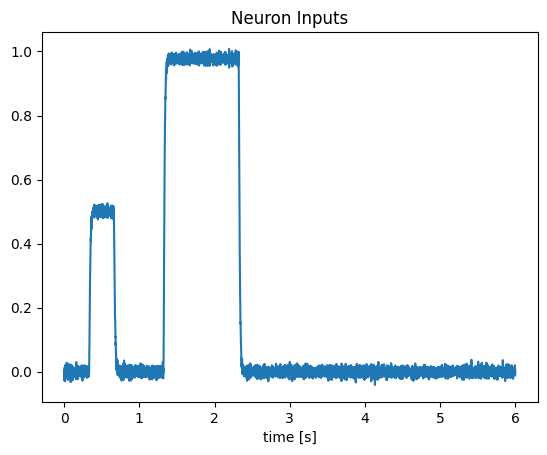

In [87]:
plt.figure()
#plt.plot(sim.trange(), sim.data[probe1], label="Input Node")
plt.plot(sim.trange(), sim.data[probe2], label="Input Ensemble")
plt.xlabel("time [s]")
#plt.legend([1, 2, 3, 4, 5])
plt.title("Neuron Inputs")